In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('/kaggle/input/moneyball/train.csv')
test = pd.read_csv('/kaggle/input/moneyball/test.csv')

# 데이터 구조 확인
print(train.head())
print(train.info())

df = train.copy()

   ID   W    G    R    AB     H    1B   2B  3B   HR  ...  HBP  BBHBP  SF  \
0   1  60  162  558  5336  1280   891  247  31  111  ...    0    460   0   
1   3  86  161  677  5620  1492  1147  216  46   83  ...    0    531   0   
2   5  79  162  679  5550  1496  1088  262  63   83  ...    0    543   0   
3   7  96  162  780  5536  1458   990  265  40  163  ...    0    561   0   
4   9  96  162  688  5441  1354   905  247  21  181  ...   55    597  35   

   Outs  Outsinplay   RA        BA       OBA       SLG       OPS  
0  4056        3216  740  0.239880  0.300207  0.360195  0.660402  
1  4128        3376  643  0.265480  0.328890  0.364591  0.693480  
2  4054        3175  710  0.269550  0.334646  0.384324  0.718971  
3  4078        3145  682  0.263367  0.331146  0.414017  0.745164  
4  4087        2703  548  0.248851  0.321258  0.401764  0.723022  

[5 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 24 columns):
 #   Column  

ID: 팀명

W: (Wins) 한 시즌에 승리한 경기수 (Target Value)

G: (Games) 경기수 (보통 162게임이 기본값; 2018년 대회에서 코로나 단축시즌같은 건 없을 듯)

R: (Runs) 득점

AB: (At Bats)타수

H: (Hits) 안타

1B / 2B / 3B / HR: 단타, 2루타, 3루타, 홈런

BB: (Base on Balls)볼넷

SO: (Strikeouts) 삼진

SB: (Stolen Bases) 도루 성공 횟수

CS: (Caught Stealing) 도루 실패 횟수

HBP: (Hit by Pitch) 몸에 맞는 공

BBHBP: BB + HBP

SF: (Sacrifice Flies) 희생플라이

Outs: 팀이 기록한 아웃카운트 총합

Outsinplay: 인플레이 상황에서 발생한 아웃

RA: (Runs Allowed) 총 실점

BA: (Batting Average) 타율

OBA: (On-Base Average) (= OBP) 출루율

SLG: (Slugging Percentage) 장타율

OPS: OBA + SLG

In [23]:
df.describe()

,ID,W,G,R,AB,H,1B,2B,3B,HR,...,HBP,BBHBP,SF,Outs,Outsinplay,RA,BA,OBA,SLG,OPS
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,...,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,581.000000,79.413081,158.969019,713.099828,5432.340792,1419.020654,976.506024,262.604131,32.425129,147.485370,...,21.846816,544.079174,17.323580,4013.320138,3043.872633,713.444062,0.261091,0.327273,0.402523,0.729796
std,335.729057,12.536626,11.372186,100.936394,396.338140,130.178377,93.027538,42.435244,10.146172,40.995229,...,28.656809,82.461301,22.231198,290.986155,253.618335,104.803539,0.012078,0.014118,0.032048,0.043866
min,1.000000,37.000000,103.000000,329.000000,3493.000000,797.000000,576.000000,119.000000,11.000000,49.000000,...,0.000000,278.000000,0.000000,2601.000000,2022.000000,343.000000,0.226356,0.284100,0.326515,0.614404
25%,291.000000,71.000000,162.000000,647.000000,5462.000000,1369.000000,937.000000,237.000000,25.000000,116.000000,...,0.000000,495.000000,0.000000,4044.000000,2952.000000,651.000000,0.252307,0.317614,0.378841,0.699169
50%,581.000000,80.000000,162.000000,712.000000,5518.000000,1432.000000,989.000000,267.000000,31.000000,147.000000,...,0.000000,544.000000,0.000000,4085.000000,3072.000000,710.000000,0.261026,0.326602,0.401113,0.728662
75%,871.000000,89.000000,162.000000,783.000000,5583.000000,1499.000000,1037.000000,289.000000,38.000000,176.000000,...,50.000000,597.000000,41.000000,4115.000000,3207.000000,779.000000,0.269683,0.336702,0.425832,0.758919
max,1161.000000,116.000000,164.000000,993.000000,5781.000000,1684.000000,1193.000000,376.000000,67.000000,257.000000,...,103.000000,802.000000,70.000000,4212.000000,3447.000000,1103.000000,0.292515,0.363665,0.483839,0.845694


**2018년 대회 & 데이터: 대회 시점 기준 40년 이상의 MLB 팀 기록**

- 경기수: 대부분 162게임이지만, 103게임, 164게임 등 이상치 존재 (노조 파업 or 162게임 체제 이전 or 타이브레이커)
- HBP/ SF: 상당수 데이터가 0 (말이 안됨) => 데이터 오류 or 집계하지 않았던 시기
  * Domain Knowledge: MLB에서 희생플라이는 1954년부터 공식적으로 집계됨.

In [24]:
# 1. SF(희생플라이)가 0인 데이터의 특성 파악 (과거 데이터인지 판별)
zero_sf_df = df[df['SF'] == 0]
normal_sf_df = df[df['SF'] > 0]

print(f"SF가 0인 데이터 개수: {len(zero_sf_df)}")
print(f"SF가 0이 아닌 데이터 개수: {len(normal_sf_df)}")

# 두 그룹의 홈런(HR)과 삼진(SO) 평균 비교
print("\n[비교] SF 유무에 따른 평균 기록:")
comparison = pd.DataFrame({
    'Metric': ['Mean HR', 'Mean SO', 'Mean G'],
    'SF=0 Group': [zero_sf_df['HR'].mean(), zero_sf_df['SO'].mean(), zero_sf_df['G'].mean()],
    'SF>0 Group': [normal_sf_df['HR'].mean(), normal_sf_df['SO'].mean(), normal_sf_df['G'].mean()]
})
print(comparison)

# Insight: 만약 SF=0 그룹의 HR/SO가 현저히 낮다면, 이는 '옛날 야구' 데이터이므로 학습에서 제외하는 것을 추천.

SF가 0인 데이터 개수: 354
SF가 0이 아닌 데이터 개수: 227

[비교] SF 유무에 따른 평균 기록:
    Metric  SF=0 Group   SF>0 Group
0  Mean HR  134.596045   167.585903
1  Mean SO  875.025424  1116.696035
2   Mean G  157.059322   161.947137


- 절반 정도 데이터가 SF & HBP 값이 아예 0
-> 1950년대 혹은 그 이전의 데이터로 추정

- 문제는 test.csv 역시 절반 정도는 SF & HBP 값이 0임

-> 현대야구와 과거야구 경향성의 차이가 있는 만큼, 경우를 나눠서 보는 게 맞아보임.

In [25]:
# 2. 파생 변수 검증 (OPS 계산이 맞는지 확인)
# 데이터에 있는 OPS 값과 직접 계산한 OPS 값의 차이(Error) 확인
# OBA + SLG = OPS
df['Calculated_OPS'] = df['OBA'] + df['SLG']
df['OPS_Error'] = df['OPS'] - df['Calculated_OPS']

print("\n[검증] 제공된 OPS와 계산된 OPS의 차이:")
print(df['OPS_Error'].describe())

# 만약 차이가 0.001 이상 나는 데이터가 많다면, 제공된 OPS 대신 직접 계산한 값을 써야 함.


[검증] 제공된 OPS와 계산된 OPS의 차이:
count    5.810000e+02
mean     5.163514e-12
std      5.068233e-10
min     -1.000000e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e-09
Name: OPS_Error, dtype: float64


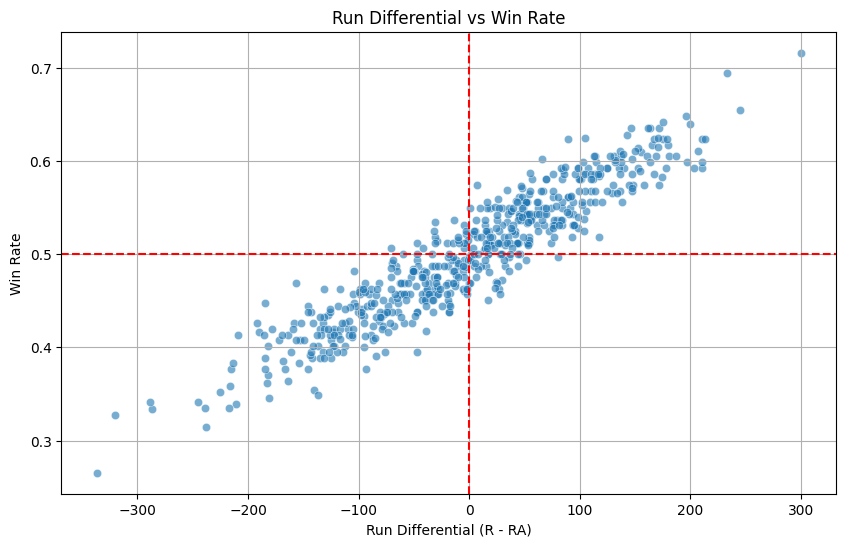

In [33]:
# 3. 승률과 득실점의 상관관계 (피타고리안 기대 승률 검증)
# 경기수(G)가 다르므로 승수(W) 대신 승률(Win_Rate) 사용
df['Win_Rate'] = df['W'] / df['G']

# 득실차(Run Differential) 계산
df['Run_Diff'] = df['R'] - df['RA']

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Run_Diff', y='Win_Rate', data=df, alpha=0.6)
plt.title('Run Differential vs Win Rate') # 득실차와 승률의 관계
plt.xlabel('Run Differential (R - RA)')
plt.ylabel('Win Rate')
plt.axvline(0, color='red', linestyle='--') # 0점 기준선
plt.axhline(0.5, color='red', linestyle='--') # 5할 승률 기준선
plt.grid(True)
plt.show()

In [42]:
# 1. 데이터 필터링 (Regime Filtering)
df_train = train.copy()
df_test = test.copy()

# ---------------------------------------------------------
# 2. Feature Engineering (새로운 변수 생성)
# ---------------------------------------------------------

# (1) 시대 구분 변수 (Marking): SF나 HBP가 0이면 과거(0), 아니면 현대(1)
# -> 데이터를 버리지 않고 모델에게 '시대 정보'를 주기 위함
def check_era(row):
    if (row['SF'] == 0) or (row['HBP'] == 0):
        return 0
    else:
        return 1

df_train['Is_Modern'] = df_train.apply(check_era, axis=1)

# (2) 승률 (Target Value): 경기수(G) 차이를 보정
df_train['Win_Rate'] = df_train['W'] / df_train['G']

# (3) 도루 성공률 (SB_Rate): SB / (SB + CS) (분모 0 방지)
df_train['SB_Rate'] = df_train['SB'] / (df_train['SB'] + df['CS'] + 1e-9)

# (4) 순수 장타율 (ISO): SLG - BA
df_train['ISO'] = df_train['SLG'] - df_train['BA']

# (5) 득실차 (Run Differential): 피타고리안 승률의 핵심 (가장 강력한 예상 변수)
df_train['RD'] = df_train['R'] - df_train['RA']

✅ Feature Engineering 완료: Is_Modern, Win_Rate, SB_Rate, ISO, RD 생성됨
------------------------------------------------------------

[Target: 승률(Win_Rate)과의 상관계수 Top 10 (양의 상관관계)]
Win_Rate    1.000000
RD          0.935326
OBA         0.508069
OPS         0.454549
R           0.434681
BA          0.429011
SLG         0.398342
BB          0.319786
ISO         0.314235
BBHBP       0.304122
Name: Win_Rate, dtype: float64

[Target: 승률(Win_Rate)과의 상관계수 Bottom 5 (음의 상관관계)]
RA          -0.481393
CS          -0.100089
SO          -0.068236
Outs        -0.034874
Is_Modern    0.002946
Name: Win_Rate, dtype: float64


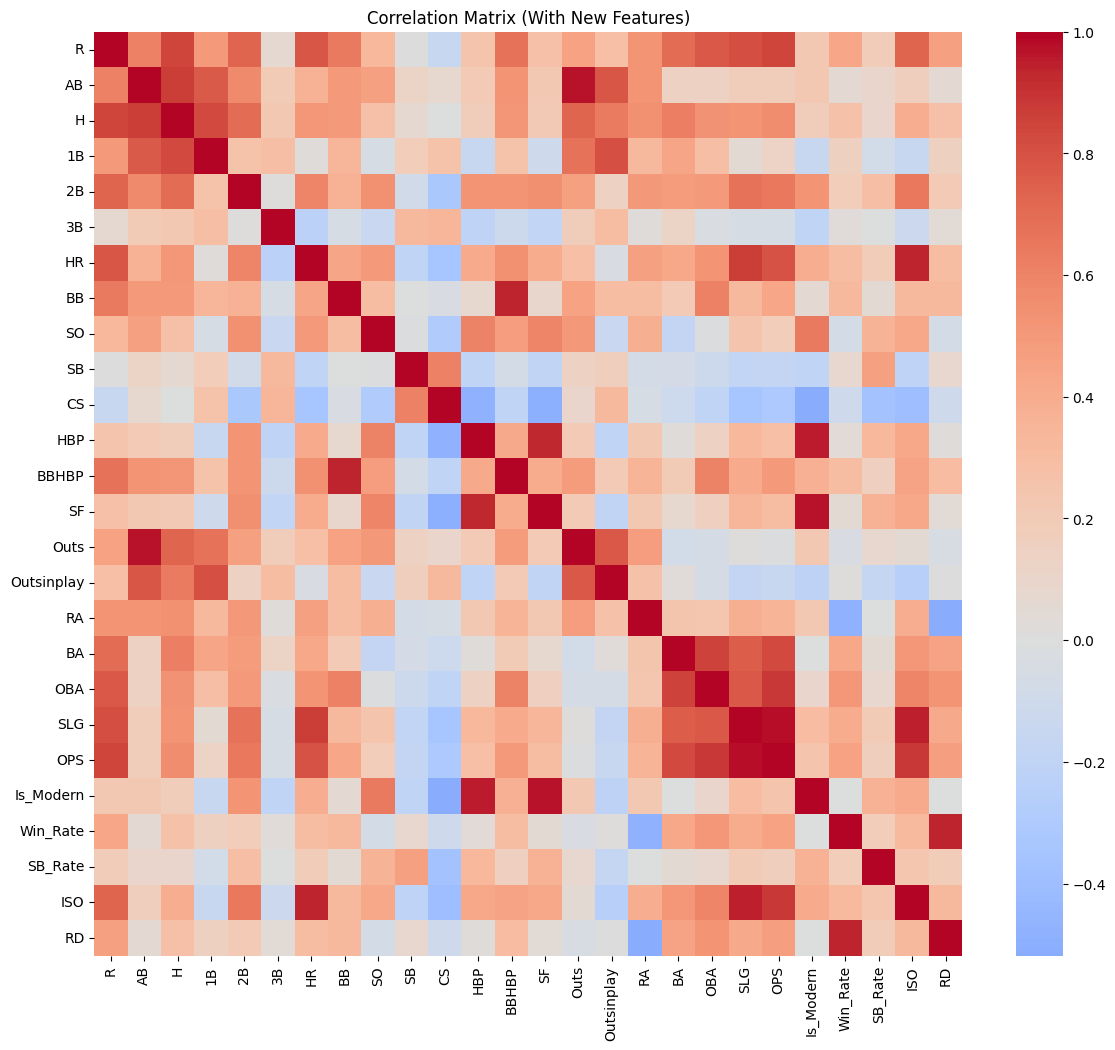

In [44]:
# ---------------------------------------------------------
# 3. 상관계수 분석
# ---------------------------------------------------------

# 분석에서 제외할 컬럼 (Data Leakage 방지 및 식별자)
# ID: 식별자
# W: 승률 계산의 분자 (정답 그 자체)
# G: 승률 계산의 분모
cols_to_drop = ['ID', 'W', 'G']

# 수치형 데이터만 선택 및 불필요 컬럼 제거
analysis_df = df_train.select_dtypes(include=['number']).drop(columns=cols_to_drop, errors='ignore')

# 상관계수 계산
corr_matrix = analysis_df.corr()

# ---------------------------------------------------------
# 4. 결과 출력
# ---------------------------------------------------------
print("✅ Feature Engineering 완료: Is_Modern, Win_Rate, SB_Rate, ISO, RD 생성됨")
print("-" * 60)

print("\n[Target: 승률(Win_Rate)과의 상관계수 Top 10 (양의 상관관계)]")
print(corr_matrix['Win_Rate'].sort_values(ascending=False).head(10))

print("\n[Target: 승률(Win_Rate)과의 상관계수 Bottom 5 (음의 상관관계)]")
print(corr_matrix['Win_Rate'].sort_values(ascending=True).head(5))

# 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (With New Features)')
plt.show()

In [51]:
# ---------------------------------------------------------
# 1. 모델링을 위한 최종 데이터셋 준비
# ---------------------------------------------------------
df_test['Is_Modern'] = df_test.apply(lambda x: 0 if (x['SF']==0 or x['HBP']==0) else 1, axis=1)
df_test['ISO'] = df_test['SLG'] - df_test['BA']
df_test['RD'] = df_test['R'] - df_test['RA']

# 예측에 사용할 변수 선정 (중복 제거 및 핵심 변수 위주)
# RD가 있으므로 R, RA는 제외 / OPS는 OBA, SLG와 겹치므로 제외
features = ['RD', 'OBA', 'SLG', 'BA', 'ISO','BB', 'Is_Modern']

# 학습용 데이터 (df는 이미 위에서 전처리 완료됨)
X = df_train[features]
y = df_train['Win_Rate'] 

# 예측용 데이터
X_test = df_test[features]

print(f"학습 데이터 크기: {X.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

학습 데이터 크기: (581, 7)
테스트 데이터 크기: (581, 7)


In [52]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge

# ---------------------------------------------------------
# 3. 모델링 (앙상블: Ridge + XGBoost)
# ---------------------------------------------------------
# K-Fold 교차 검증 설정 (데이터가 적으므로 5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 1: Ridge Regression (선형 관계 & 과적합 방지)
# RD(득실차)가 승률과 선형 관계가 강하므로 Ridge가 매우 중요합니다.
model_ridge = Ridge(alpha=1.0)

# 모델 2: XGBoost Regressor (비선형 패턴 학습)
# 데이터가 적으므로 깊이(max_depth)를 3으로 제한해 과적합을 막습니다.
model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# 교차 검증 점수 확인 (RMSE)
print("\n[Cross Validation Score - RMSE]")
score_ridge = -cross_val_score(model_ridge, X, y, scoring='neg_mean_absolute_error', cv=kf)
print(f"Ridge   : {np.mean(score_ridge):.4f}")

score_xgb = -cross_val_score(model_xgb, X, y, scoring='neg_mean_absolute_error', cv=kf)
print(f"XGBoost : {np.mean(score_xgb):.4f}")


[Cross Validation Score - RMSE]
Ridge   : 0.0201
XGBoost : 0.0214


In [53]:
print(test.head())

   ID    G    R    AB     H    1B   2B  3B   HR   BB  ...  HBP  BBHBP  SF  \
0   2  162  643  5436  1415   971  270  32  142  448  ...   43    491  45   
1   4  162  798  5464  1463   920  300  29  214  520  ...   52    572  51   
2   6  162  667  5513  1394   916  289  34  155  442  ...   51    493  32   
3   8  162  710  5394  1360   929  256  22  153  631  ...    0    631   0   
4  10  162  793  5728  1545  1005  336  15  189  608  ...   55    663  43   

   Outs  Outsinplay   RA        BA       OBA       SLG       OPS  
0  4021        3031  770  0.260302  0.319156  0.400110  0.719266  
1  4001        3003  795  0.267753  0.334319  0.450769  0.785088  
2  4119        3033  633  0.252857  0.312521  0.401959  0.714480  
3  4034        2865  781  0.252132  0.330456  0.392844  0.723300  
4  4183        3122  742  0.269728  0.343177  0.432612  0.775789  

[5 rows x 23 columns]


In [54]:
# ---------------------------------------------------------
# 4. 최종 예측 및 제출 파일 생성
# ---------------------------------------------------------
model_ridge.fit(X, y)
model_xgb.fit(X, y)

pred_ridge = model_ridge.predict(X_test)
pred_xgb = model_xgb.predict(X_test)

# 두 모델의 예측값을 5:5로 섞음 (가중 평균)
final_pred_win_rate = (pred_ridge * 0.5) + (pred_xgb * 0.5)

# 승률(Win_Rate) -> 승수(W) 변환 및 반올림
final_pred_w = (final_pred_win_rate * df_test['G']).round().astype(int)

# 제출 파일 생성
submission = pd.DataFrame({
    'ID': df_test['ID'],
    'W': final_pred_w
})

print("\n[Submission Preview]")
print(submission.head())

submission.to_csv('submission.csv', index=False)
print("\n✅ 'submission.csv' 파일이 저장되었습니다.")


[Submission Preview]
   ID   W
0   2  67
1   4  81
2   6  85
3   8  74
4  10  87

✅ 'submission_mae.csv' 파일이 저장되었습니다.
